<a href="https://colab.research.google.com/github/JhonnyLimachi/Sigmoidal/blob/main/63_Sobre_o_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Visualizações de Dados com Python**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

In [1]:
# importar pacotes
import numpy as np
import matplotlib.pyplot as plt

# Conhecendo o Matplotlib

Muitos usam, poucos entendem. Matplotlib é a principal biblioteca para visualização do Python. Construída em cima de *arrays* do `numpy` e concebida para integrar com as principais ferramentes de *Data Science*, Matplotlib foi criada em 2002 pelo John Hunter.

John era um neurobiologista que analisava sinais de eletrocorticografia, juntamente com um time de pesquisadores. Como eles usavam um *software* proprietário e tinham apenas uma licença, o pesquisador criou o Matplotlib para suprir essa necessidade original, insipirando-se na interface scriptada que o MATLAB proporcionava.

Quando eu disse na primeira linha que muitas pessoas usam a biblioteca, mas poucas de fato a entendem, eu quis dizer que  elas desconhecem a maneira como a arquitetura do `matplotlib` foi pensada.

## Arquitetura do Matplotlib

Basicamente, a arquitetura do `matplotlib` é composta de 3 camadas:

1. ***Scripting Layer***
2. ***Artist Layer***
3. ***Backend Layer***

Para entender como o pacote funciona, é preciso entender que a arquitetura do Matplotlib foi feita para permitir aos seus usuários criarem, renderizarem e atualizarem objetos do tipo `Figure`. Essas *Figuras* são exibidas na tela e interagem com eventos como os *inputs* do teclado e mouse. Esse tipo de interação é realizada na camada ***backend***.

O Matplotlib permite que você crie um gráfico composto por múltiplos objetos diferentes. É como se ele não gerasse uma coisa única, mas uma imagem que é composta de vários pedaços isolados, como o eixo-y, eixo-y, título, legendas, entre outras. A capacidade de alterar todos múltiplos objetos é proporcionada pela camada ***artist***. Olhe o código abaixo e veja como estamos lidandos com esses "múltiplos objetos". Plotamos os dados no plano cartesiano, criamos um título e demos *labels* aos eixos x e y.

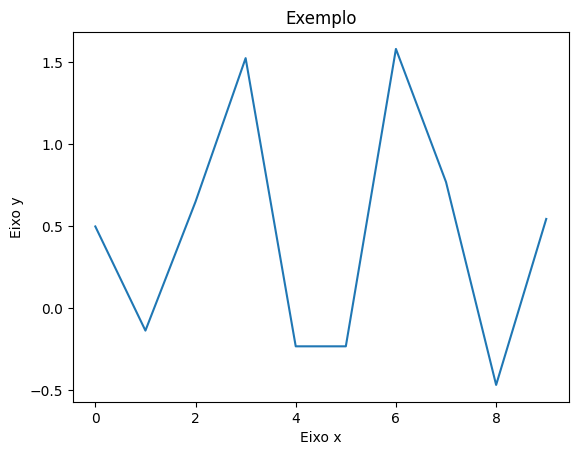

In [2]:
# gerar valores demonstrativos
np.random.seed(42)
x = np.arange(10)
y = np.random.normal(size=10)

# plotar os valores
plt.plot(x, y)
plt.title("Exemplo")
plt.xlabel("Eixo x")
plt.ylabel("Eixo y")

plt.show()

Para você, usuário, conseguir se comunicar com essas duas camadas, e manipular as `Figures`, existe uma terceira camada, a camada ***scripting***. Ela abstrai em um nível mais alto todo contato com o Matplotlib, e permite que de maneira simples e direta possamos criar nossos *plots*.

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/matplotlib_arquitetura.jpg" width="400px"></center>

Quero pedir a você para [ler este artigo](https://realpython.com/python-matplotlib-guide/) do *blog* ***Real Python***. É um dos melhores aritogs sobre matplotlib que já tive contato, e vai explicar vários conceitos da ferramenta. Você não precisa saber os detalhes da arquitetura do `matplotlib`, mas precisa ter uma ideia geral sobre seu funcionamento. Caso queira se aprofundar mais ainda, recomendo o livro [*Mastering matplotlib*](https://learning.oreilly.com/library/view/mastering-matplotlib/9781783987542/).

## Conhecendo mais intimamente o Matplotlib

Se você lembrar das aulas anteriores, plotar um gráfico é muito simples e direto. Algo como `plt.plot(x, y)` vai te dar prontamente um gráfico.

No entanto, essa abstração esconde um segredo importante: a hierarquia de 3 objetos que estão por trás de cada *plot*. Vou usar as imagens do artigo [*Python Plotting With Matplotlib*](https://realpython.com/python-matplotlib-guide/) para facilitar o entendimento desse conceito.

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/fig_map.bc8c7cabd823.png" height="300px"></center>

O objeto mais "exterior" a cada plot é o objeto do tipo `Figure`. Dentro de uma `Figure` existe um objeto do tipo `Axes`. Dentro de cada `Axes` ficam os objetos menores, como legendas, títulos, textos e *tick marks*.

Como disse Brad Solomon no artigo, a principal confusão das pessoas é não entenderem que um *plot* (ou gráfico) individual está contido dentro de um objeto `Axes`. Uma `Figure` não é o *plot* em si, ela pode conter um ou mais *plots* (e cada *plot* é um `Axes`).

Como eu disse, cada `Axes` é composto de objetos menores que compõe o *plot* propriamente dito. A grande maioria das pessoas (incluindo eu mesmo) conhece apenas or principais, como título, eixos, labels e legenda. No entanto, para você ver a anatomia completa dentro de um `Axes`, pode usar o código abaixo, disponibilizado na [documentação oficial do `matplotlib`](https://matplotlib.org/examples/showcase/anatomy.html).
